# Homework 3: Tables and Charts

Please complete this notebook by filling in the cells provided. When you’re done:

1. Select `Run All` from the `Cell` menu to ensure that you have executed all cells.
2. Select `Download as PDF via LaTeX (.pdf)` from the `File` menu
3. Read that file! If any of your lines are too long and get cut off, we won't be able to see them,
   so break them up into multiple lines and download again.
4. Submit that downloaded file to Gradescope.

If you cannot submit online, come to office hours for assistance. The office hours
schedule appears on [data8.org/fa16/weekly.html](http://data8.org/fa16/weekly.html).

This assignment is due Thursday, September 15 at 5PM. You will receive an early submission bonus point if you turn it in by Wednesday, September 14 at 5PM. Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

Reading:
- Textbook chapter [5](http://www.inferentialthinking.com/chapters/05/tables.html)

Run the cell below to prepare the notebook. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Differences between Universities, Part II


**Question 1.** Suppose you're choosing a university to attend, and you'd like to *quantify* how *dissimilar* any two universities are.  You rate each university you're considering on several numerical traits.  You decide on a very detailed list of 1000 traits, and you measure all of them!  Some examples:

* The cost to attend (per year)
* The average Yelp review of nearby Thai restaurants
* The USA Today ranking of the Medical school
* The USA Today ranking of the Engineering school

You decide that the dissimilarity between two universities is the *total* of the differences in their traits.  That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the 1000 differences in their trait values.

In the next cell, we've loaded arrays containing the 1000 trait values for Stanford and Berkeley.  Compute the dissimilarity (according to the above method) between Stanford and Berkeley.  Call your answer `dissimilarity`.  Use a single line of code to compute the answer.

*Note:* The data we're using aren't real -- we made them up for this exercise, except for the cost-of-attendance numbers, which we estimated for a student from a median-income family living in California using [this tool](http://college-tuition.startclass.com).

In [2]:
stanford = Table.read_table("stanford.csv").column("Trait value")
berkeley = Table.read_table("berkeley.csv").column("Trait value")

dissimilarity = (np.abs(stanford - berkeley)).sum()
dissimilarity

14060.558701067919

In [3]:
_ = tests.grade('q1_1')

**Question 2.** Identify all the subexpressions in your answer to the previous question, excluding the whole expression itself.  Write each on its own line.  Before each one, write a one-line comment describing the value of the subexpression, including what type of value it is.  We've written the first one for you.  (It should appear somewhere in your answer to the previous question!)

In [ ]:
# An array of 1000 numbers, each a different measured trait of Stanford University.
stanford
...

**Question 3.** Why do we sum up the absolute values of the differences in trait values, rather than just summing up the differences?

To prevent dissimilarity in stanford - berkeley & berkeley - stanford

##### Weighing the traits
After computing dissimilarities between several schools, you notice a problem with your method: the scale of the traits matters a lot.

Since schools cost tens of thousands of dollars to attend, the cost-to-attend trait is always a much bigger *number* than most other traits.  That makes it affect the dissimilarity a lot more than other traits.  Two schools that differ in cost-to-attend by \$900, but are otherwise identical, get a dissimilarity of 900.  But two schools that differ in graduation rate by .9 (a huge difference!), but are otherwise identical, get a dissimilarity of only .9.

One way to fix this problem is to assign different "weights" to different traits.  For example, we could fix the problem above by multiplying the difference in the cost-to-attend traits by .001, so that a difference of \$900 in cost-to-attend results in a dissimilarity of $900 \times .001$, or $.9$.

Here's a revised method that does that for every trait:

1. For each trait, subtract the two schools' trait values.
2. Then take the absolute value of that difference.
3. *Now multiply that absolute value by a trait-specific number, like .001 or 2.*
4. Now sum the 1000 resulting numbers.

**Question 4.** Suppose you've already decided on a weight for each trait.  These are loaded into an array called `weights` in the cell below.  `weights.item(0)` is the weight for the first trait, `weights.item(1)` is the weight for the second trait, and so on.  Use the revised method to compute a revised dissimilarity between Berkeley and Stanford.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [8]:
weights = Table.read_table("weights.csv").column("Weight")
weights

revised_dissimilarity = ((np.abs(stanford - berkeley)) * weights).sum()
revised_dissimilarity

505.98313211458844

In [5]:
_ = tests.grade('q1_4')

## 2. Period Plots


Below is a plot that compares the number of characters to the number of periods in each chapter of Little Women.  Each point represents one chapter.

<img src="little_women.png">

**Question 1.** About how many periods are in the chapter with the most characters per period?

In [ ]:
periods_in_most_characters_per_period = 250

**Question 2.** About how many periods are in the chapter with the most characters?

In [ ]:
periods_in_most_characters = 380 (400)

## 3. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below we've loaded data on unemployment in the United States.  There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [9]:
unemployment = Table().read_table("unemployment.csv")
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [4]:
_ = tests.grade('q3_1')

**Question 2.** Sort the data in decreasing order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in decreasing order by NEI-PTER instead.

In [10]:
by_nei = unemployment.sort("NEI", descending=True)
by_nei_pter = unemployment.sort("NEI-PTER", descending=True)

In [6]:
_ = tests.grade('q3_2')

**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [11]:
greatest_nei = by_nei.take(np.arange(10))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [8]:
_ = tests.grade('q3_3')

**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the proportion of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [12]:
pter = unemployment.column("NEI-PTER") - unemployment.column("NEI")
pter

array([ 1.0746,  1.1644,  1.1555,  1.129 ,  1.2139,  1.0757,  1.1282,
        1.1114,  1.0529,  1.0744,  1.1004,  1.0747,  1.0705,  1.0455,
        1.008 ,  0.9734,  0.9753,  0.8931,  0.9451,  0.8367,  0.8208,
        0.8105,  0.8248,  0.7578,  0.7251,  0.7445,  0.7543,  0.7423,
        0.7399,  0.7687,  0.8418,  0.9923,  0.9181,  0.9629,  0.9703,
        0.9575,  1.0333,  1.0781,  1.0675,  1.0354,  1.0601,  1.01  ,
        1.0042,  1.0368,  0.9704,  0.923 ,  0.9759,  0.93  ,  0.889 ,
        0.821 ,  0.9409,  0.955 ,  0.898 ,  0.8948,  0.9523,  0.9579,
        1.0149,  1.0762,  1.2873,  1.4335,  1.7446,  1.8415,  1.9315,
        1.8859,  1.8257,  1.9067,  1.8376,  1.8473,  1.7993,  1.8061,
        1.7651,  1.7927,  1.7286,  1.6387,  1.6808,  1.6805,  1.6629,
        1.6253,  1.6477,  1.6298,  1.4796,  1.5131,  1.4866,  1.4345,
        1.3675,  1.3097,  1.2319,  1.1735,  1.1844,  1.1746])

In [12]:
_ = tests.grade('q3_4')

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in decreasing order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [13]:
by_pter = (unemployment.with_column("PTER", pter)).sort("PTER", descending=True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [14]:
_ = tests.grade('q3_5')

**Question 6.** Does it seem true that the PTER rate was very high during the Great Recession, compared to other periods in the dataset?  **Also**, is the sorted table the best way to find this out, or can you think of other ways to look at the data to answer this question?

*Write your answer here, replacing this text.*

## 4. Consumer Financial Protection Bureau Complaints


The Consumer Financial Protection Bureau has collected and published consumer complaints against financial companies since 2011.  The data are available [here](https://dev.socrata.com/foundry/data.consumerfinance.gov/jhzv-w97w) (or at this [direct link](https://data.consumerfinance.gov/resource/jhzv-w97w.csv).  For this exercise, to make your code run faster, we've selected only the data from May 2016.

Run the next cell to load the data.  Each row represents one consumer's complaint.

In [14]:
# Just run this cell.
complaints = Table.read_table("complaints.csv")
complaints

company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1920073,(None),(None),Yes,2016-05-11T15:39:07.000,2016-05-11T15:39:07.000,Credit reporting company's investigation,Credit reporting,VT,Inadequate help over the phone,(None),Phone,(None),Yes,05035
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1914777,(None),Consent not provided,No,2016-05-08T00:53:47.000,2016-05-12T18:40:34.000,Incorrect information on credit report,Credit reporting,MO,Information is not mine,(None),Web,(None),Yes,63020
Bank of America,Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1907306,I became aware of several charges on a Bank of America c ...,Consent provided,No,2016-05-03T16:49:33.000,2016-05-03T16:49:34.000,Other,Credit card,VA,(None),(None),Web,(None),Yes,239XX
Finance of America Reverse LLC,Company believes it acted appropriately as authorized by ...,Closed with explanation,1919055,I applied for a reverse mortgage and everthing was going ...,Consent provided,No,2016-05-10T20:13:22.000,2016-05-10T20:13:23.000,"Application, originator, mortgage broker",Mortgage,TX,(None),Reverse mortgage,Web,Older American,Yes,774XX
"Acceptance Solutions Group, INC",Company believes it acted appropriately as authorized by ...,Closed with explanation,1908628,Keeps calling numbers that are not mine. And talking to ...,Consent provided,No,2016-05-03T21:05:42.000,2016-05-06T13:42:45.000,Improper contact or sharing of info,Debt collection,OH,Talked to a third party about my debt,Payday loan,Web,(None),Yes,430XX
Equifax,(None),Closed with explanation,1909176,(None),(None),No,2016-05-04T20:08:06.000,2016-05-09T15:11:00.000,Incorrect information on credit report,Credit reporting,NC,Information is not mine,(None),Postal mail,(None),Yes,28052
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1914477,When I enter my personal information to receive my credi ...,Consent provided,No,2016-05-06T23:09:50.000,2016-05-08T22:40:19.000,Unable to get credit report/credit score,Credit reporting,OH,Problem getting my free annual report,(None),Web,(None),Yes,450XX
Encore Capital Group,(None),Closed with non-monetary relief,1919937,(None),Consent not provided,(None),2016-05-11T18:58:25.000,2016-05-11T21:53:54.000,Cont'd attempts collect debt not owed,Debt collection,CT,Debt is not mine,Credit card,Web,Older American,Yes,06801
Nationstar Mortgage,(None),Closed with explanation,1920517,I am livid with Nation Star for refusing to work with me ...,Consent provided,(None),2016-05-11T20:38:09.000,2016-05-11T20:38:09.000,"Application, originator, mortgage broker",Mortgage,IL,(None),Conventional adjustable mortgage (ARM),Web,(None),Yes,606XX
"Convergent Resources, Inc.",(None),Closed with explanation,1920464,(None),Consent not provided,No,2016-05-11T12:16:31.000,2016-05-11T12:16:32.000,Cont'd attempts collect debt not owed,Debt collection,TX,Debt is not mine,"Other (i.e. phone, health club, etc.)",Web,(None),Yes,78109


**Question 1.** Financial companies offer a variety of products.  How many complaints were made against each kind of product?  Make a table called `complaints_per_product` with one row per product category and 2 columns: "product" (the name of the product) and "number of complaints" (the number of complaints made against that kind of product).

In [16]:
complaints_per_product = complaints.group("product")
complaints_per_product.relabeled('count', 'number of complaints')

product,number of complaints
Bank account or service,1687
Consumer Loan,775
Credit card,1566
Credit reporting,3820
Debt collection,3022
Money transfers,142
Mortgage,3468
Other financial service,16
Payday loan,119
Prepaid card,110


In [5]:
_ = tests.grade('q4_1')

**Question 2.** Make a bar chart showing how many complaints were made about each product category.

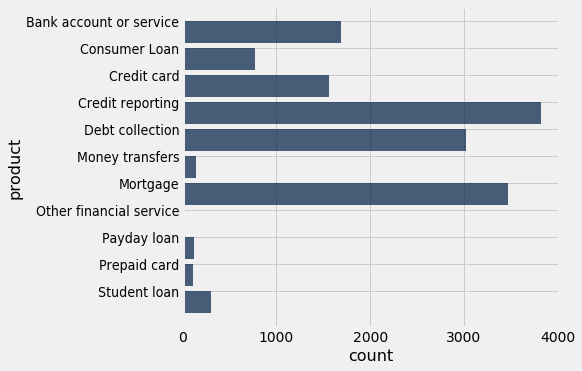

In [19]:
complaints_per_product.barh("product")

**Question 3.** Make a table of the number of complaints made against each *company*.  Call it `complaints_per_company`.  It should have one row per company and 2 columns: "company" (the name of the company) and "number of complaints" (the number of complaints made against that company).

In [22]:
complaints_per_company = complaints.group("company")
complaints_per_company = complaints_per_company.relabeled('count', 'number of complaints')


In [8]:
_ = tests.grade('q4_3')

**Question 4.** It wouldn't be a good idea to make a bar chart of that data.  (Don't try it!)  Why not?

*Write your answer here, replacing this text.*

**Question 5.** Make a bar chart of just the companies with the most complaints.  Specifically, make a chart that displays the number of complaints against the companies with the 10 most complaints.

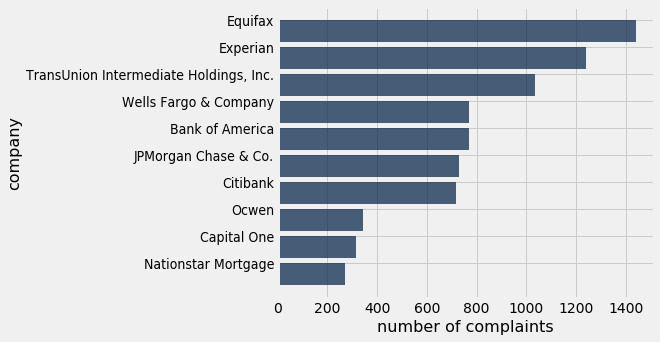

In [24]:
complaints_top_10_companies = complaints_per_company.sort('number of complaints', descending=True).take(np.arange(10))
complaints_top_10_companies.barh("company")

**Question 6.** Make a bar chart like the one above, with one difference: The size of each company's bar should be the *proportion* (among *all complaints* made against any company in `complaints`) that were made against that company.

**Note:** Graphs aren't very useful without accurate labels.  Make sure that the text on the horizontal axis of the graph makes sense.

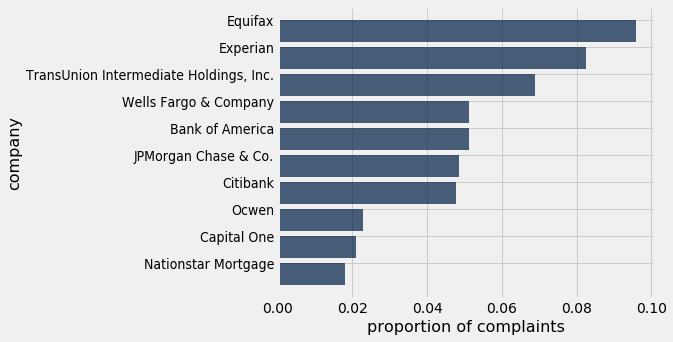

In [27]:
complaints_top_10_companies = complaints_top_10_companies.with_columns("proportion of complaints", 
                                                                       complaints_top_10_companies.column("number of complaints") / complaints.num_rows)
complaints_top_10_companies.drop("number of complaints").barh("company")

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")